## Importing Libraries

In [233]:
import pandas as pd
import numpy as np
from datetime import datetime
import ast

import industryMap

## Importing data

In [234]:
# Importing File
user_df = pd.read_csv('../SavedData/Lloyds_users.csv')

# Changing the lists back to normal columns
user_df['user_biz_interaction'] = user_df['user_biz_interaction'].apply(ast.literal_eval)
user_df['user_biz_interaction_frequency'] = user_df['user_biz_interaction_frequency'].apply(ast.literal_eval)
user_df['user_biz_spend'] = user_df['user_biz_spend'].apply(ast.literal_eval)
user_df['user_user_interaction'] = user_df['user_user_interaction'].apply(ast.literal_eval)
user_df['user_user_interaction_frequency'] = user_df['user_user_interaction_frequency'].apply(ast.literal_eval)
user_df['user_user_spend'] = user_df['user_user_spend'].apply(ast.literal_eval)
user_df['user_industry_interaction'] = user_df['user_industry_interaction'].apply(ast.literal_eval)
user_df['user_industry_interaction_frequency'] = user_df['user_industry_interaction_frequency'].apply(ast.literal_eval)
user_df['user_industry_spend'] = user_df['user_industry_spend'].apply(ast.literal_eval)
user_df['user_date_transaction'] = user_df['user_date_transaction'].apply(ast.literal_eval)
user_df['user_date_transaction_freq'] = user_df['user_date_transaction_freq'].apply(ast.literal_eval)

## Get Relative Number of Users

In [235]:
user_num = len(user_df['user_id'])

# If you pick a threshold to high, some industries won't have enough unique users to build the dictionary effectively
# Anywhere above 4% starts to include anyone who has spent at an Accessory store, and in fact runs out of people to include in the list
# This causes the dictionary entries to be of different lengths
user_perc = 20
user_perc_threshold = int(round(user_num * (user_perc / 100), 0))

## Industry Big Spenders

In [236]:
#industry_list = list(set(industryMap.industry_categories.values()))
#industry_list.remove('Accessories')

industry_list = ['Cafes', 'TV/Film', 'Lunch / Light Meal']

industry_user_spend = {}

for industry in industry_list:
    
    user_spend_dict = {}
    top_n = user_perc_threshold
    
    for row in range(0, len(user_df)):
        if(industry in user_df['user_industry_interaction'][row]):
            industry_index = user_df['user_industry_interaction'][row].index(industry)
            industry_spend = user_df['user_industry_spend'][row][industry_index]
            
            user_spend_dict[user_df['user_id'][row]] = industry_spend
    
    sorted_user_spend_dict = dict(sorted(user_spend_dict.items(), key=lambda item: item[1], reverse=True)[:top_n])
            
    sorted_user_spend_user_list = list(sorted_user_spend_dict.keys())
    sorted_user_spend_spend_list = list(sorted_user_spend_dict.values())
            
    industry_user_spend[industry + ' users'] = sorted_user_spend_user_list
    industry_user_spend[industry + ' spends'] = sorted_user_spend_spend_list 

## Building Recommendation DataFrame

In [237]:
recommend_user_df = pd.DataFrame(data=industry_user_spend)

## Club Lloyds

In [238]:
# Getting the High Receivers and Creating Dictionary
monthly_received_list_estimate = [x / 12 for x in user_df['received_tx_sum_gbp']]
club_lloyds_ad_dict = dict(zip(user_df['user_id'], monthly_received_list_estimate))
sorted_club_lloyds_ad_dict = dict(sorted(club_lloyds_ad_dict.items(), key=lambda item: item[1], reverse=True)[:top_n])

# Adding this to the dataframe
recommend_user_df['Club Lloyds Target users'] = sorted_club_lloyds_ad_dict.keys()
recommend_user_df['Club Lloyds Target monthly recieves'] = sorted_club_lloyds_ad_dict.values()

In [239]:
user_df[user_df['user_id'] == 67945]['received_tx_sum_gbp']

5336    483241.3
Name: received_tx_sum_gbp, dtype: float64

## Saving Dataframe to CSV

In [240]:
recommend_user_df

,Cafes users,Cafes spends,TV/Film users,TV/Film spends,Lunch / Light Meal users,Lunch / Light Meal spends,Club Lloyds Target users,Club Lloyds Target monthly recieves
0,84946,2419.40,8295,530.88,1615,1921.02,62396,42610.995833
1,76581,2415.95,75897,517.88,84302,1828.73,67945,40270.108333
2,29460,2391.95,29418,500.88,51233,1820.91,68986,39703.404167
3,40532,2382.90,32858,494.88,37688,1820.29,32858,36529.708333
4,41688,2381.10,40921,486.88,97898,1803.98,13904,36198.741667
...,...,...,...,...,...,...,...,...
1623,61341,1963.70,73842,352.88,3102,1065.50,13133,223.023333
1624,18852,1963.55,76527,352.88,81946,1065.00,53441,217.846667
1625,92237,1963.50,76757,352.88,99288,1060.73,56748,215.879167
1626,24009,1963.40,78468,352.88,48390,1049.50,64207,215.541667


## Things to Record

In [241]:
# Total Number of People who receive 1800 a month
# Overlapping Bar Chart Showing Spend in Users for the Key Industries

In [242]:
# Total number of people eligible to recieve club lloyds for free
club_lloyds_free = recommend_user_df[recommend_user_df['Club Lloyds Target monthly recieves'] > 1800]
len(club_lloyds_free)

187

In [243]:
# Overlapping Bar Chart Showing Spend in Users for the Key Industries
club_lloyds_deal = recommend_user_df.loc[:, ['Cafes spends', 'TV/Film spends', 'Lunch / Light Meal spends']]
club_lloyds_deal = club_lloyds_deal[['Cafes spends', 'TV/Film spends', 'Lunch / Light Meal spends']] / 12

tv_cl_list = club_lloyds_deal['TV/Film spends']
llm_cl_list = club_lloyds_deal['Lunch / Light Meal spends']
cafes_cl_list = club_lloyds_deal['Cafes spends']

In [244]:
tv_cl_list

0       44.240000
1       43.156667
2       41.740000
3       41.240000
4       40.573333
          ...    
1623    29.406667
1624    29.406667
1625    29.406667
1626    29.406667
1627    29.406667
Name: TV/Film spends, Length: 1628, dtype: float64

## Graphing the Spending

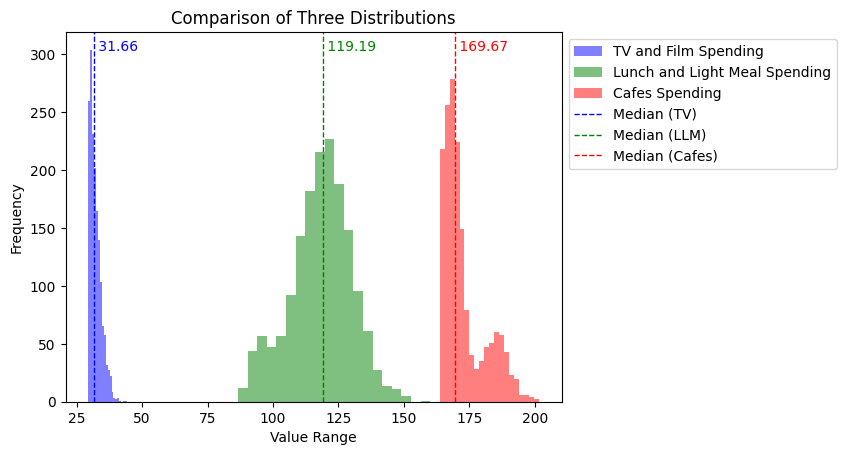

In [250]:
import matplotlib.pyplot as plt

plt.hist(tv_cl_list, bins=20, alpha=0.5, label='TV and Film Spending', color='blue')
plt.hist(llm_cl_list, bins=20, alpha=0.5, label='Lunch and Light Meal Spending', color='green')
plt.hist(cafes_cl_list, bins=20, alpha=0.5, label='Cafes Spending', color='red')

# Calculating the median's of each histogram
median_tv_cl = np.median(tv_cl_list)
median_llm_cl = np.median(llm_cl_list)
median_cafes_cl = np.median(cafes_cl_list)

plt.axvline(median_tv_cl, color='blue', linestyle='dashed', linewidth=1, label='Median (TV)')
plt.axvline(median_llm_cl, color='green', linestyle='dashed', linewidth=1, label='Median (LLM)')
plt.axvline(median_cafes_cl, color='red', linestyle='dashed', linewidth=1, label='Median (Cafes)')

# Adding labels directly next to the median lines
plt.text(median_tv_cl, plt.ylim()[1]*0.95, ' {:.2f}'.format(median_tv_cl), color='blue')
plt.text(median_llm_cl, plt.ylim()[1]*0.95, ' {:.2f}'.format(median_llm_cl), color='green')
plt.text(median_cafes_cl, plt.ylim()[1]*0.95, ' {:.2f}'.format(median_cafes_cl), color='red')

plt.title('Comparison of Three Distributions')
plt.xlabel('Value Range')
plt.ylabel('Frequency')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()